<a href="https://colab.research.google.com/github/rat-nick/ml-lab/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [233]:
data = pd.read_csv("./sample_data/mnist_train_small.csv")

In [234]:
from sklearn.model_selection import train_test_split
data = data.rename(columns={"6": "label"})
data.head()
print(data.shape)

train, test = train_test_split(data, test_size=0.2)

(19999, 785)


array([[<Axes: title={'center': 'label'}>]], dtype=object)

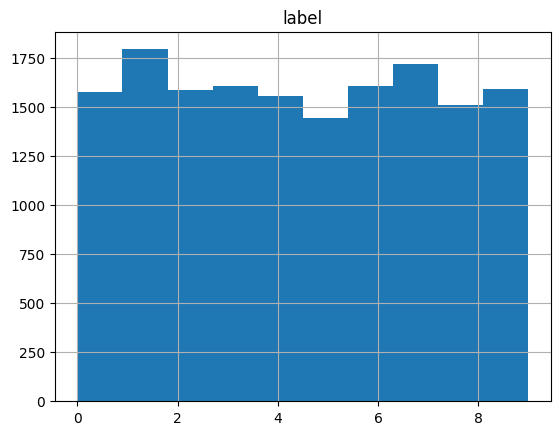

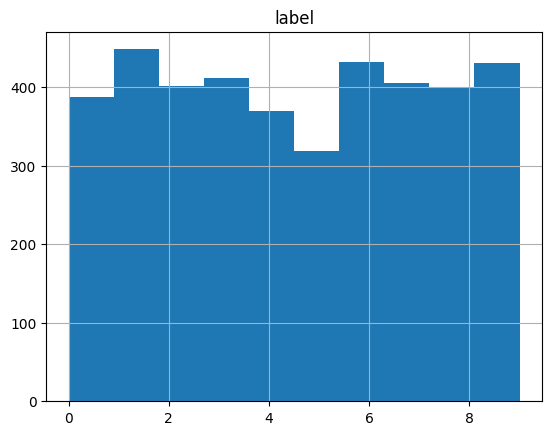

In [235]:
train.hist(column='label')
test.hist(column="label")

In [236]:
train = np.array(train)
test = np.array(test)

train = train.T



In [237]:
y_train = train[0]
X_train = train[1:]
print(X_train.shape)
m = X_train.shape[1]
X_train = X_train / 255
print(y_train)

(784, 15999)
[6 2 9 ... 4 4 5]


In [238]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [239]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 0.001, 100)

Iteration:  0
[1 4 5 ... 5 5 5] [6 2 9 ... 4 4 5]
0.07700481280080004
Iteration:  10
[1 4 5 ... 5 5 5] [6 2 9 ... 4 4 5]
0.07775485967872992
Iteration:  20
[1 4 5 ... 5 5 5] [6 2 9 ... 4 4 5]
0.0790674417151072
Iteration:  30
[1 4 5 ... 5 5 5] [6 2 9 ... 4 4 5]
0.08050503156447278
Iteration:  40
[1 4 5 ... 5 5 5] [6 2 9 ... 4 4 5]
0.08219263703981498
Iteration:  50
[1 4 5 ... 5 5 5] [6 2 9 ... 4 4 5]
0.08338021126320395
Iteration:  60
[1 4 5 ... 5 5 5] [6 2 9 ... 4 4 5]
0.08450528158009876
Iteration:  70
[1 4 5 ... 5 5 5] [6 2 9 ... 4 4 5]
0.08588036752297018
Iteration:  80
[1 4 5 ... 5 5 5] [6 2 9 ... 4 4 5]
0.08838052378273642
Iteration:  90
[1 4 5 ... 5 5 5] [6 2 9 ... 4 4 5]
0.089818113632102


In [254]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(784, 100),
            nn.ReLU(),
            nn.Linear(100, 10),
            nn.Softmax()
        )

    def forward(self, x):
        return self.net(x)

    def predict(self, x):
        out = self.forward(x)
        out = torch.argmax(out, dim=1)
        return out

In [255]:
import torch.nn.functional as F
def fit(X, y, model, epoch, loss_fn, opt):
    ohy = F.one_hot(y.to(torch.int64), 10).float()
    for i in range(epoch):
        loss = loss_fn(model.forward(X), ohy)
        loss.backward()
        opt.step()
        opt.zero_grad()
        # log performanse modela
        out = model.predict(X)
        print(out)
        print(y)
        acc = accuracy(out, y)
        print("Accuracy: ", acc)

def accuracy(pred, actual):
    s = torch.sum(pred == actual)
    return s.item() / len(actual)

In [256]:
import torch.optim as optim
import torch.nn.functional as F
import torch
model = Model()
epochs = 100
lr = 1e-3
opt = optim.Adam(model.parameters(), lr=lr)
loss = F.cross_entropy

X = torch.from_numpy(X_train.T).float()
y = torch.from_numpy(y_train).long()
fit(X, y, model, epochs, loss, opt)

tensor([6, 6, 6,  ..., 6, 6, 2])
tensor([6, 2, 9,  ..., 4, 4, 5])
Accuracy:  0.2034502156384774
tensor([6, 6, 9,  ..., 6, 6, 2])
tensor([6, 2, 9,  ..., 4, 4, 5])
Accuracy:  0.31745734108381773
tensor([6, 6, 9,  ..., 6, 6, 2])
tensor([6, 2, 9,  ..., 4, 4, 5])
Accuracy:  0.4209638102381399
tensor([6, 6, 9,  ..., 4, 6, 2])
tensor([6, 2, 9,  ..., 4, 4, 5])
Accuracy:  0.5079692480780049
tensor([6, 3, 9,  ..., 4, 6, 2])
tensor([6, 2, 9,  ..., 4, 4, 5])
Accuracy:  0.5721607600475029
tensor([6, 3, 9,  ..., 4, 6, 2])
tensor([6, 2, 9,  ..., 4, 4, 5])
Accuracy:  0.6092255765985374
tensor([6, 3, 9,  ..., 6, 6, 2])
tensor([6, 2, 9,  ..., 4, 4, 5])
Accuracy:  0.6223513969623101
tensor([6, 3, 9,  ..., 6, 6, 2])
tensor([6, 2, 9,  ..., 4, 4, 5])
Accuracy:  0.6264766547909244
tensor([6, 3, 9,  ..., 6, 6, 2])
tensor([6, 2, 9,  ..., 4, 4, 5])
Accuracy:  0.6229139321207575
tensor([6, 3, 9,  ..., 6, 6, 2])
tensor([6, 2, 9,  ..., 4, 4, 5])
Accuracy:  0.6152259516219764
tensor([6, 3, 7,  ..., 6, 6, 2])
tensor